# L03- Support Vector Machine

- This notebook was prepared for MECE 610: Machine Learning Control in Engineering Application course at the University of Alberta
- The notebook and examples are developed by **Armin Norouzi**

**Table of Contents:**

1.  Support Vector Machine - linear kernel
2.  Support Vector Machine - kernel trick
3.  Examples in Python - classification
4.  Example in Python - Regression

### Support Vector Machine (SVM)- linear kernel



-   is one of the supervised machine learning methods
-   was introduced for a classification problem in 1964 
-   SVM is typically used for labeled data classification and function approximation (regression)
-   by generating a set of hyperplanes in an infinite-dimensional space



-   the application of SVM in the regression or so-called Support Vector Regression (SVR)
-   was introduced by Vapkin in 1995.
-   SVR is used for function approximation to find a correlation between labeled data.




-   For a given learning data, $ \{\mathbf{u_i}, \mathbf{z_i} \}$,
    -   where $\mathbf{u_i}$ is feature set and $\mathbf{z_i}$ is target output



**SVR -approximate function**



The approximate function for a given data set can be defined as

\begin{equation}\label{eq:reg_func}
\mathbf{y(u_i)} = \mathbf{w}^T\mathbf{u_i}  + \mathbf{b}
\end{equation}

-   where $\mathbf{w}$ and $\mathbf{b}$ are found by solving the SVR algorithm \cite{cortes1995support}



**SVR - solve a convex optimization**



-   Thus, a convex optimization problem is defined as

\begin{equation}
\begin{split}
\textbf{Minimize: } \ & \frac{1}{2} ||\mathbf{w}||^2_2\\
\textbf{Subject to: \ } &
    \begin{cases}
      \ \mathbf{z_i} - \mathbf{w}^T\mathbf{u_i} - \mathbf{b} \leq \mathbf{\epsilon}\\
         \ \mathbf{w}^T\mathbf{u_i} + \mathbf{b} - \mathbf{z_i} \leq \ -\mathbf{\epsilon}\\
    \end{cases} \ \ \ \ i = 1, ..., n
  \end{split}
\end{equation}

-   If such a function, $\mathbf{y(u_i)}$

\vskip 1.0truecm

-   which approximates all pairs of labeled learning data within a defined $\epsilon$ margin ($-\mathbf{\epsilon} \leq \mathbf{z_i}-\mathbf{y_i}  \leq \mathbf{\epsilon}$)
-   and is as smooth as possible,

-   is found by solving above optimization
    -   the convex optimization problem is feasible.
    -   Otherwise, the convex optimization is infeasible.



**Slack variables**



-   Slack variables ($\mathbf{\zeta}^-_i, \mathbf{\zeta}^+_i $ ) are added as a penalty variable
-   which regulates error tolerate of optimization as

\begin{equation}\label{eq:zita}
-\mathbf{\epsilon} - \mathbf{\zeta}^-_i \leq  \mathbf{z_i} -\mathbf{y_i} \leq \mathbf{\epsilon} + \mathbf{\zeta}^+_i
\end{equation}



**To overcome convex optimization problem in-feasibility**



-   the Soft Margin Loss Function (SMLF) with definition of slack variables ( $\mathbf{\zeta}^-_i, \mathbf{\zeta}^+_i$) is used as \cite{cortes1995support}

\begin{equation}\label{eq:es_func}
L_{\epsilon} (\mathbf{z_i} , \mathbf{y_i}) =
    \begin{cases}
          0 & |\mathbf{z_i} - \mathbf{y_i}| \leq \mathbf{\epsilon} \\
          |\mathbf{z_i} - \mathbf{y_i}| - \mathbf{\epsilon} & otherwise \\
        \end{cases}
\end{equation}

-   The SMLF is equal to summation of slack variables as \cite{cortes1995support}

\begin{equation}\label{eq:zita2}
L_{\epsilon} (\mathbf{\zeta}^-_i , \mathbf{\zeta}^+_i) = \mathbf{\zeta}^-_i + \mathbf{\zeta}^+_i
\end{equation}



**Soft Margin Loss Function (SMLF)**



The SMLF with slacks variables is shown schematically in Fig. [2](#orgcf46b5b)

![](https://github.com/arminnorouzi/ML-developed_course/blob/main/L03_SVM/figures/svm_soft_margin.PNG?raw=true)



SMLF of approximate function



-   the convex problem is now defined to
    -   optimize smoothness of approximate function and minimize the SMLF
    -   and associated constraint as  \cite{smola2004tutorial}:

\begin{equation}\label{eq:optcov_slack}
\begin{split}
\textbf{Minimize: } \ &\frac{1}{2} ||\mathbf{w}||^2_2 + C \sum_{i = 1}^n (\mathbf{\zeta_i^+} + \mathbf{\zeta_i^-})\\
\textbf{Subject to: \ } &
    \begin{cases}
      \ \mathbf{z_i} - \mathbf{w}^T\mathbf{u_i} - \mathbf{b} \leq \mathbf{\epsilon} + \mathbf{\zeta_i^+}\\
         \ \mathbf{w}^T\mathbf{u_i} + \mathbf{b} - \mathbf{z_i} \leq \mathbf{\epsilon} + \mathbf{\zeta_i^-}\\
          \mathbf{\zeta_i^-},  \mathbf{\zeta_i^+} \geq 0 \\
    \end{cases} \quad i = 1, ..., n
  \end{split}
\end{equation}

where $C$ is a  positive parameter which is used to adjust trade-off between model tolerated error and model smoothness.



**To solve the convex problem**



-   the Lagrangian function (primal objective function) is calculated as \cite{smola2004tutorial}

\begin{equation}
\begin{split}
L =& \frac{1}{2} ||\mathbf{w}||^2_2 +  C \sum_{i = 1}^N \big(\mathbf{\zeta}^-_i + \mathbf{\zeta}^+_i\big)\\
&- \sum_{i = 1}^N \alpha^+_i (-\mathbf{z_i} + \mathbf{y_i} + \mathbf{\epsilon} + \mathbf{\zeta}^+_i) - \sum_{i = 1}^N \mu^+_i \mathbf{\zeta}^+_i  \\
&- \sum_{i = 1}^N \alpha^-_i (\mathbf{z_i} - \mathbf{y_i} + \mathbf{\epsilon} + \mathbf{\zeta}^-_i) - \sum_{i = 1}^N \mu^-_i \mathbf{\zeta}^-_i
  \end{split}
\end{equation}

where $\alpha^+_i$, $\alpha^-_i$, $\mu^+_i$, and $\mu^-_i$ are Lagrangian multipliers \cite{smola2004tutorial}. 



**Solve the optimization**



-   by calculating the partial differential of Lagrangian function with respect to the primal variables equal as \cite{smola2004tutorial}

\begin{equation}
\begin{split}
    \frac{\partial L}{\partial \mathbf{w}} = 0& \; \rightarrow \; \mathbf{w} = \sum_{i = 1}^N (\alpha_i^+ - \alpha_i^-)\mathbf{u_i} \\
    \frac{\partial L}{\partial \mathbf{b}} = 0&~\rightarrow~ \sum_{i = 1}^N (\alpha_i^+ - \alpha_i^-) = 0 \\
    \frac{\partial L}{\partial \mathbf{\zeta}^+_i} = 0& \; \rightarrow \;  \alpha_i^+ + \mu^+_i = C \\
    \frac{\partial L}{\partial \mathbf{\zeta}^-_i} = 0& \; \rightarrow\;  \alpha_i^- + \mu^-_i = C
\end{split}
\end{equation}



**Dual optimization problem**



-   Substituting these to optimization problem generates the dual optimization problem as:

\begin{equation}
\begin{split}
\textbf{Minimize:} \; L =& \frac{1}{2} \sum_{i = 1}^N \sum_{j = 1}^N (\alpha_i^+ - \alpha_i^-)(\alpha_j^+ - \alpha_j^-) \mathbf{u_i}^T\mathbf{u_j} \\
& + \sum_{i = 1}^N (\alpha_i^ + - \alpha_i^-)\mathbf{z_i} - \mathbf{\epsilon} \sum_{i = 1}^N (\alpha_i^+ + \alpha_i^-)\\
\textbf{Subject to:} \; &
  \begin{cases}
    & \sum_{i = 1}^N (\alpha_i^+ - \alpha_i^-) = 0\\
    & 0 \leq \alpha_i^+ \leq C \\
    & 0 \leq \alpha_i^- \leq C
  \end{cases}
  \end{split}
\end{equation}



**A standard Quadratic programming form (QP) is obtained**



-   by rewriting prevous equation

\begin{equation}
\begin{split}
\textbf{Minimize:} \quad & \frac{1}{2} \alpha^T \mathbf{\mathcal{H}} \alpha + f^T \alpha \\
\textbf{Subject to:} \quad & A_{eq} \alpha = B_{eq}
  \end{split}
\end{equation}




**Karush-Kuhn-Tucker (KKT) conditions**



-   Now, $\alpha$ is found by solving QP equation
-   and then substituting $\alpha$ into optimizaiton problem, $\mathbf{w}$ is obtained.
-   To find $\mathbf{b}$, Karush-Kuhn-Tucker (KKT) conditions is applied to dual optimization problem
-   Based on KKT conditions, the following equations must be fulfilled at the optimum point

\begin{quation}
\begin{align}
 \alpha_i^+ (-\mathbf{z_i} + \mathbf{y_i} + \mathbf{\epsilon} + \mathbf{\zeta}_i^+) =  0 \\
 \alpha_i^- (\mathbf{z_i} - \mathbf{y_i} + \mathbf{\epsilon} + \mathbf{\zeta}_i^-) =  0\\
 \mu_i^+ \mathbf{\zeta}_i^+ =  (C- \alpha_i^+)\mathbf{\zeta}_i^+\\
 \mu_i^- \mathbf{\zeta}_i^- =  (C- \alpha_i^-)\mathbf{\zeta}_i^-
\end{align}
\end{equation}



Based on our optimization problem constraints:

\begin{equation}
\begin{split}
 \alpha_i^+  = \alpha_i^- = 0\\
 0 < \alpha_i^+ < C, \ \alpha_i^- = 0 \\
 0 < \alpha_i^- < C, \ \alpha_i^+ = 0\\
 \alpha_i^+ = C, \ \alpha_i^- = 0\\
 \alpha_i^- = C, \ \alpha_i^+ = 0
\end{split}
\end{equation}



**KKT - support vectors index**



-   the exact value of $|\mathbf{z_i} - \mathbf{y_i}| = \mathbf{\epsilon}$ will be obtained
-   and the set of data which the error between prediction and actual equals to $\mathbf{\epsilon}$, can be calculated as

\begin{equation}
S = \{\;i\;|\;0 < \alpha_i^+ \;+\; \alpha_i^- <C \} 
\end{equation}

where $S$ is called support vectors index. 



**Support vector set**



As the support vector set $ \mathbf{z_i} = \mathbf{y_i} + sign(\alpha_i^+ - \alpha_i^-)\mathbf{\epsilon}$ is true, $\mathbf{b}$ can be calculated as

\begin{equation}\label{eq:b}
\mathbf{b} = \frac{1}{|S|} \sum_{i \in S}^S (\mathbf{z_i} -\mathbf{w}^T\mathbf{u_i} - sign(\alpha_i^+ - \alpha_i^-)\mathbf{\epsilon})
\end{equation}



## Support Vector Machine - kernel trick



-   To improve the performance of conventional SVM in providing distribution predictions
-   an implicit feature space is used instead of simply computing the inner product in prevous section,
-   $\mathbf{u_i}^T\mathbf{u_j}$ (a high-dimensional map).
-   In this case the optimization problem is to find the smoothest function in the feature space instead of the input space
-   The nonlinear kernel is now used by mapping the training pattern into the feature space instead of using the term $\mathbf{u_i}^T \mathbf{u_j}$.



-   for non-linear SVM, a low-dimensional input space with a high-dimensional feature space is used,
-   while for a linear SVM a high-dimensional linear input space is used \cite{murty2016support}.

-   Thus, the kernel is defined as $K(\mathbf{u_i},\mathbf{u_j})$, and used instead of $\mathbf{u_i}^T\mathbf{u_j}$ in Eq. \ref{eq:dual1}.
-   Therefore,  ${H}$ is changed with ${H} = \left[ K(\mathbf{u_i},\mathbf{u_j})  \right]$.



**Kernel based dual problem**



-   So, the dual problem for kernel-based SVM is obtained as \cite{cortes1995support}

\begin{equation}\label{eq:dualkernel}
  \begin{split}
    \textbf{Minimize:} \; L =& \frac{1}{2} \sum_{i = 1}^N \sum_{j = 1}^N (\alpha_i^+ - \alpha_i^-)(\alpha_j^+ - \alpha_j^-)K(\mathbf{u_i},\mathbf{u_j}) \\
    & + \sum_{i = 1}^N (\alpha_i^+ - \alpha_i^-)\mathbf{z_i} - \mathbf{\epsilon} \sum_{i = 1}^N (\alpha_i^+ + \alpha_i^-)\\
   \textbf{Subject to:} \; &
   \begin{cases}
     & \sum_{i = 1}^N (\alpha_i^+ - \alpha_i^-) = 0\\
     & 0 \leq \alpha_i^+ \leq C \\
     & 0 \leq \alpha_i^- \leq C
   \end{cases}
 \end{split}
\end{equation}



**Kernel Based - QP problem**



-   $\mathbf{w}$ is calculated as $w = \sum_{i = 1}^N (\alpha_i^+ - \alpha_i^-)\mathbf{u_i}$,
-   which is linear combination of training data
-   and using kernel function instead of inner product ($K(\mathbf{u_i},\mathbf{u_j})$ instead of $\mathbf{u_i}\mathbf{u}$),
-   the approximate function is calculated as

\begin{equation}
\mathbf{y} = \sum_{i=1}^n (\alpha_i^+ - \alpha_i^-)K(\mathbf{u_i},\mathbf{u})  + \mathbf{b}
\end{equation}



**Special case, radial basis function (RBF) kernel is used in kernel based SVM**



-   then it can be represent as Radial Basis Function Network (RBFN) shown schematically in Figure
-   The RBF kernel function is defined as

\begin{equation}
K(\mathbf{u_i},\mathbf{u_j}) = exp \bigg(  \frac{||\mathbf{u_i} - \mathbf{u_j}||_2^2}{2 \sigma^2} \bigg)
\end{equation}

-   where $\sigma$ is free variables that acts like
    -   Gaussian variance in probability density function of a normally distributed random variable
-   and $||.||_2$ is the Euclidean norm.

![](https://github.com/arminnorouzi/ML-developed_course/blob/main/L03_SVM/figures/kernel_svm.PNG?raw=true)



## SVM Example classification - Python toolbox



**Using toolbox of SVM- classification**



In [32]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [33]:
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

**Import data and show**



In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/ML-developed_course/main/Data/Engine_NOx_classification.csv')
data.head()

,Load [ft.lb],Engine speed [rpm],mf [mg/stroke],Pr [PSI],NOx [ppm],High NOx
0,50,2502.400000,31.222326,15285.16744,103.899724,0
1,50,2248.666667,30.116667,15155.13333,112.610181,0
2,75,2502.000000,38.300000,15356.00000,114.789893,0
3,100,2504.000000,42.900000,15296.00000,125.411970,0
4,75,2262.000000,34.100000,15254.00000,126.524679,0


**Setup test and training data and plot**



In [35]:
cdf = data[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]', 'High NOx']]

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Text(0, 0.5, 'Engine speed [rpm]')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


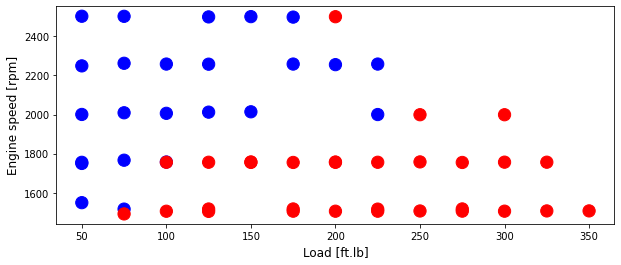

In [36]:
colors = {0: 'blue', 1:'red', 2:'green', 3:'coral', 4:'orange', 5:'black'}

area = 150
# area = 200
plt.figure(1, figsize=(10, 4))
plt.scatter(train['Load [ft.lb]'], train['Engine speed [rpm]'], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)

plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('Engine speed [rpm]', fontsize=12)

**Plot test set**



Text(0, 0.5, 'Engine speed [rpm]')

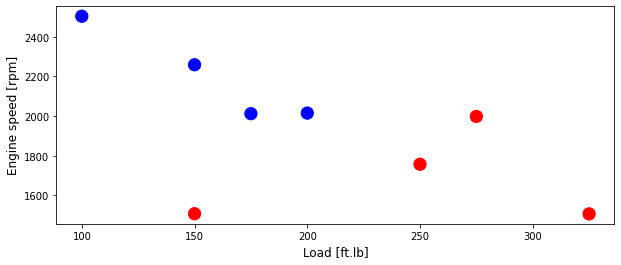

In [37]:
area = 150
# area = 200
plt.figure(1, figsize=(10, 4))
plt.scatter(test['Load [ft.lb]'], test['Engine speed [rpm]'], s=area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)

plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('Engine speed [rpm]', fontsize=12)

**Pre- processing**



In [38]:
from sklearn import preprocessing


train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]']])
train_y = np.asanyarray(train[['High NOx']])

test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]']])
test_y = np.asanyarray(test[['High NOx']])


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_x)
X_test_minmax = min_max_scaler.transform(test_x)

**Linear SVM classifier**



In [39]:
X = X_train_minmax
Y = train_y

Xts = X_test_minmax
Yts = test_y

from sklearn import svm

In [40]:
clf = svm.SVC(kernel='linear')
clf.fit(X, np.ravel(Y,order='C'))

SVC(kernel='linear')

In [41]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Linear SVM - now plot**



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Traing accuracy: 90.74074074074075 %
Testing accuracy: 87.5 %


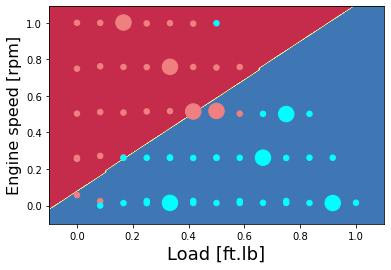

In [42]:
colors = {0: 'lightcoral', 1:'aqua', 2:'green', 3:'coral', 4:'orange', 5:'black'}

X_plot = X_train_minmax.T
Y_plot = train_y.T

X_plot_ts = X_test_minmax.T
Y_plot_ts = test_y.T

# Set min and max values and give it some padding
x_min, x_max = X_plot[0, :].min() - 0.1, X_plot[0, :].max() + 0.1
y_min, y_max = X_plot[1, :].min() - 0.1, X_plot[1, :].max() + 0.1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel().T, yy.ravel().T])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
area = 30
plt.scatter(X_plot[0,:], X_plot[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
plt.scatter(X_plot_ts[0,:], X_plot_ts[1,:], s=8*area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)
plt.xlabel('Load [ft.lb]', fontsize=18)
plt.ylabel('Engine speed [rpm]', fontsize=16)


predictions = clf.predict(X)
predictions_test = clf.predict(Xts)
accuracy = float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.size)*100)
accuracy_test = float((np.dot(Yts.T,predictions_test.T) + np.dot(1-Yts.T,1-predictions_test.T))/float(Yts.size)*100)
print ("Traing accuracy: {} %".format(accuracy))
print ("Testing accuracy: {} %".format(accuracy_test))

**RBF SVM classifier**



In [43]:
clf_n = svm.SVC(kernel='rbf')
clf_n.fit(X, np.ravel(Y,order='C'))

SVC()

**Plot RBF SVM Classifier**



Traing accuracy: 92.5925925925926 %
Testing accuracy: 100.0 %


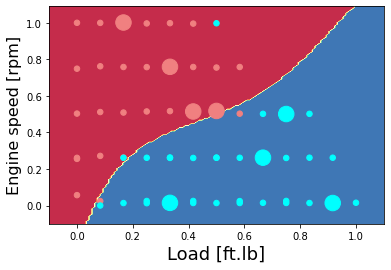

In [44]:
colors = {0: 'lightcoral', 1:'aqua', 2:'green', 3:'coral', 4:'orange', 5:'black'}

X_plot = X_train_minmax.T
Y_plot = train_y.T

X_plot_ts = X_test_minmax.T
Y_plot_ts = test_y.T

# Set min and max values and give it some padding
x_min, x_max = X_plot[0, :].min() - 0.1, X_plot[0, :].max() + 0.1
y_min, y_max = X_plot[1, :].min() - 0.1, X_plot[1, :].max() + 0.1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf_n.predict(np.c_[xx.ravel().T, yy.ravel().T])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
area = 30
plt.scatter(X_plot[0,:], X_plot[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
plt.scatter(X_plot_ts[0,:], X_plot_ts[1,:], s=8*area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)
plt.xlabel('Load [ft.lb]', fontsize=18)
plt.ylabel('Engine speed [rpm]', fontsize=16)

predictions = clf_n.predict(X)
predictions_test = clf_n.predict(Xts)
accuracy = float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.size)*100)
accuracy_test = float((np.dot(Yts.T,predictions_test.T) + np.dot(1-Yts.T,1-predictions_test.T))/float(Yts.size)*100)
print ("Traing accuracy: {} %".format(accuracy))
print ("Testing accuracy: {} %".format(accuracy_test))

**Polynomial SVM classifier**



In [45]:
clf_n = svm.SVC(kernel='poly', degree = 2)
clf_n.fit(X, np.ravel(Y,order='C'))

SVC(degree=2, kernel='poly')

**Plot Polynomial SVM Classifier**



Traing accuracy: 90.74074074074075 %
Testing accuracy: 87.5 %


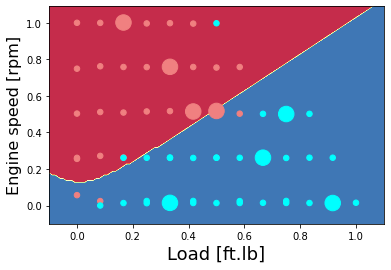

In [46]:
colors = {0: 'lightcoral', 1:'aqua', 2:'green', 3:'coral', 4:'orange', 5:'black'}

X_plot = X_train_minmax.T
Y_plot = train_y.T

X_plot_ts = X_test_minmax.T
Y_plot_ts = test_y.T

# Set min and max values and give it some padding
x_min, x_max = X_plot[0, :].min() - 0.1, X_plot[0, :].max() + 0.1
y_min, y_max = X_plot[1, :].min() - 0.1, X_plot[1, :].max() + 0.1
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf_n.predict(np.c_[xx.ravel().T, yy.ravel().T])
Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
area = 30
plt.scatter(X_plot[0,:], X_plot[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
plt.scatter(X_plot_ts[0,:], X_plot_ts[1,:], s=8*area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)
plt.xlabel('Load [ft.lb]', fontsize=18)
plt.ylabel('Engine speed [rpm]', fontsize=16)


predictions = clf_n.predict(X)
predictions_test = clf_n.predict(Xts)
accuracy = float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.size)*100)
accuracy_test = float((np.dot(Yts.T,predictions_test.T) + np.dot(1-Yts.T,1-predictions_test.T))/float(Yts.size)*100)
print ("Traing accuracy: {} %".format(accuracy))
print ("Testing accuracy: {} %".format(accuracy_test))

**Effect of Regularization parameter (C)**



Accuracy for C = 0.1: 90.74074074074075 %
Accuracy test for C = 0.1: 87.5 %
Accuracy for C = 1: 92.5925925925926 %
Accuracy test for C = 1: 100.0 %
Accuracy for C = 10: 92.5925925925926 %
Accuracy test for C = 10: 100.0 %
Accuracy for C = 100: 96.29629629629629 %
Accuracy test for C = 100: 100.0 %
Accuracy for C = 1000: 98.14814814814815 %
Accuracy test for C = 1000: 100.0 %


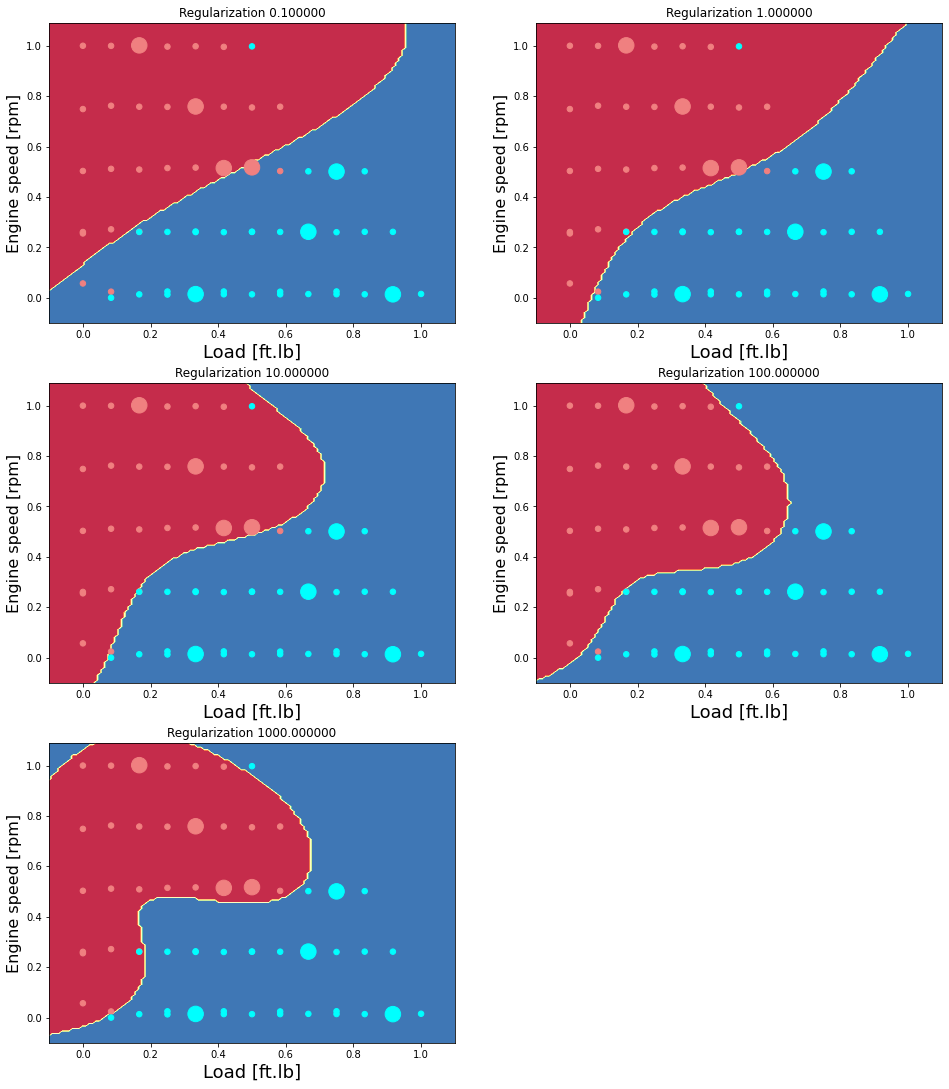

In [47]:
plt.figure(figsize=(16, 32))
CC = [0.1, 1, 10, 100, 1000]
for i, c in enumerate(CC):
    
    plt.subplot(5, 2, i+1)
    plt.title('Regularization %1.6f' %c)
    clf = svm.SVC(kernel='rbf', C=c)
    clf.fit(X, np.ravel(Y,order='C'))
    
    
    predictions = clf.predict(X)
    predictions_test = clf.predict(Xts)
    accuracy = float((np.dot(Y.T,predictions.T) + np.dot(1-Y.T,1-predictions.T))/float(Y.size)*100)
    accuracy_test = float((np.dot(Yts.T,predictions_test.T) + np.dot(1-Yts.T,1-predictions_test.T))/float(Yts.size)*100)
    print ("Accuracy for C = {}: {} %".format(c, accuracy))
    print ("Accuracy test for C = {}: {} %".format(c, accuracy_test))
    
    X_plot = X_train_minmax.T
    Y_plot = train_y.T
    
    X_plot_ts = X_test_minmax.T
    Y_plot_ts = test_y.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X_plot[0, :].min() - 0.1, X_plot[0, :].max() + 0.1
    y_min, y_max = X_plot[1, :].min() - 0.1, X_plot[1, :].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel().T, yy.ravel().T])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    area = 30
    plt.scatter(X_plot[0,:], X_plot[1,:], s=area, c=np.array(train['High NOx'].map(colors).tolist()), alpha=1)
    plt.scatter(X_plot_ts[0,:], X_plot_ts[1,:], s=8*area, c=np.array(test['High NOx'].map(colors).tolist()), alpha=1)
    plt.xlabel('Load [ft.lb]', fontsize=18)
    plt.ylabel('Engine speed [rpm]', fontsize=16)

## SVM Example Regression - use Toolbox



**Using toolbox of SVM- Regression**



-   import the necessary libraries



In [48]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

**Import the data and view and plot**



In [49]:
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/ML-developed_course/main/Data/Engine_NOx_classification.csv')
data.head()

,Load [ft.lb],Engine speed [rpm],mf [mg/stroke],Pr [PSI],NOx [ppm],High NOx
0,50,2502.400000,31.222326,15285.16744,103.899724,0
1,50,2248.666667,30.116667,15155.13333,112.610181,0
2,75,2502.000000,38.300000,15356.00000,114.789893,0
3,100,2504.000000,42.900000,15296.00000,125.411970,0
4,75,2262.000000,34.100000,15254.00000,126.524679,0


In [50]:
cdf = data[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]', 'NOx [ppm]']]

msk = np.random.rand(len(data)) < 0.8
train = cdf[msk]
test = cdf[~msk]

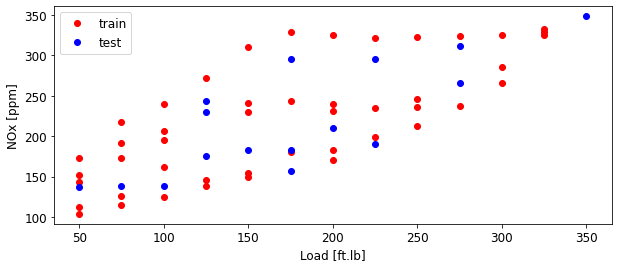

In [51]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

plt.figure(1, figsize=(10, 4))
plt.plot(train['Load [ft.lb]'], train['NOx [ppm]'], 'or', label = 'train')
plt.plot(test['Load [ft.lb]'], test['NOx [ppm]'], 'ob', label = 'test')
plt.xlabel('Load [ft.lb]', fontsize=12)
plt.ylabel('NOx [ppm]', fontsize=12)
plt.legend(fontsize=12)

**Setup Training and test data**



In [52]:
from sklearn import preprocessing

train_x = np.asanyarray(train[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])


test_x = np.asanyarray(test[['Load [ft.lb]','Engine speed [rpm]','mf [mg/stroke]','Pr [PSI]']])



train_y = np.asanyarray(train[['NOx [ppm]']])


test_y = np.asanyarray(test[['NOx [ppm]']])


min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_x)
X_test_minmax = min_max_scaler.transform(test_x)

**Use a Linear SVM regressor**



-   set training and test data



In [53]:
X = X_train_minmax
Y = train_y

Xts = X_test_minmax
Yts = test_y

from sklearn import svm

**Set Linear SVR kernel fit and plot**



In [54]:
clf = svm.SVR(kernel='linear', C=100.0, epsilon=0.1)
clf.fit(X, train_y.ravel())

train_y_hat = clf.predict(X)
test_y_hat = clf.predict(Xts)

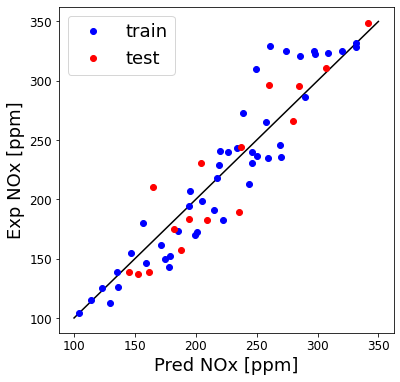

In [55]:
plt.figure(1, figsize=(6, 6))
plt.plot([100,350], [100, 350],  '-k')
plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
plt.ylabel("Exp NOx [ppm]", fontsize=18)
plt.xlabel("Pred NOx [ppm]", fontsize=18)
plt.legend(fontsize=18)

**Linear SVM find the R-squared**



In [56]:
from sklearn.metrics import r2_score

r2_test = r2_score(test_y_hat, test_y.ravel())
r2_train = r2_score(train_y_hat, train_y.ravel())

print ('Train R^2= %1.3f' % r2_train)
print ('Test R^2= %1.3f' % r2_test)

Train R^2= 0.831
Test R^2= 0.825


**Now try RBF SVM regressor - plot and R-squared**



Train R^2= 0.991
Test R^2= 0.963


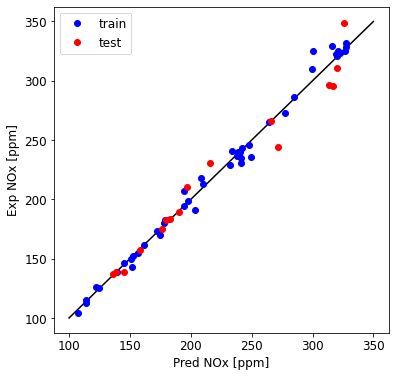

In [57]:
clf = svm.SVR(kernel='rbf', C=100, epsilon=1)
clf.fit(X, train_y.ravel())

train_y_hat = clf.predict(X)
test_y_hat = clf.predict(Xts)


plt.figure(1, figsize=(6, 6))
plt.plot([100,350], [100, 350],  '-k')
plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
plt.ylabel("Exp NOx [ppm]", fontsize=12)
plt.xlabel("Pred NOx [ppm]", fontsize=12)
plt.legend(fontsize=12)


r2_test = clf.score(X_test_minmax, test_y.ravel())
r2_train = clf.score(X_train_minmax, train_y.ravel())

print ('Train R^2= %1.3f' % r2_train)
print ('Test R^2= %1.3f' % r2_test)

**Look at the effect of Regularization parameter (C) with RBF kernel**



Accuracy for C = 0.1: 0.018131827660262667 %
Accuracy test for C = 0.1: 0.014557556184450315 %
Accuracy for C = 1: 0.18390143165144712 %
Accuracy test for C = 1: 0.1813043392008694 %
Accuracy for C = 10: 0.7633813950729389 %
Accuracy test for C = 10: 0.7483026977139662 %
Accuracy for C = 100: 0.9923597702160059 %
Accuracy test for C = 100: 0.9600492914342109 %
Accuracy for C = 1000: 0.9963253987827496 %
Accuracy test for C = 1000: 0.9558914262095715 %


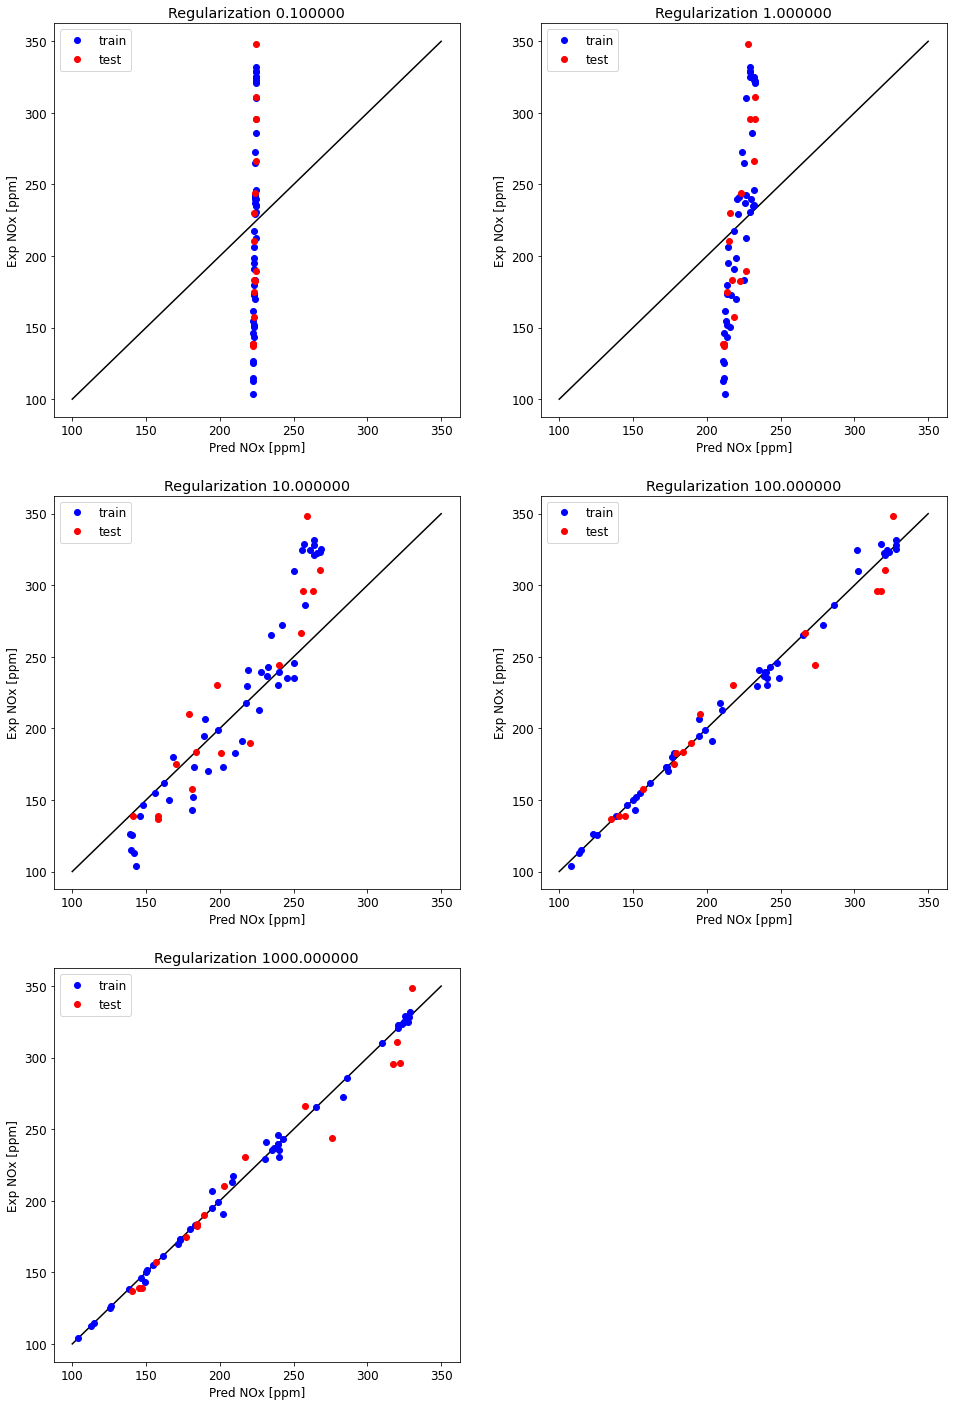

In [58]:
plt.figure(figsize=(16, 42))
CC = [0.1, 1, 10, 100, 1000]
for i, c in enumerate(CC):
    
    plt.subplot(5, 2, i+1)
    plt.title('Regularization %1.6f' %c)
    clf = svm.SVR(kernel='rbf', C=c)
    clf.fit(X, train_y.ravel())
    
    
    train_y_hat = clf.predict(X)
    test_y_hat = clf.predict(Xts)
    r2_test = clf.score(X_test_minmax, test_y.ravel())
    r2_train = clf.score(X_train_minmax, train_y.ravel())
    
    print ("Accuracy for C = {}: {} %".format(c, r2_train))
    print ("Accuracy test for C = {}: {} %".format(c, r2_test))
    

    plt.plot([100,350], [100, 350],  '-k')
    plt.plot(train_y_hat, train['NOx [ppm]'], 'ob', label = 'train')
    plt.plot(test_y_hat, test['NOx [ppm]'], 'or', label = 'test')
    plt.ylabel("Exp NOx [ppm]", fontsize=12)
    plt.xlabel("Pred NOx [ppm]", fontsize=12)
    plt.legend(fontsize=12)

## References

[1] Géron, Aurélien. Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.", 2019.

[2] https://www.coursera.org/specializations/deep-learning?utm_source=gg&utm_medium=sem&utm_content=01-CatalogDSA-ML2-US&campaignid=12490862811&adgroupid=119269357576&device=c&keyword=&matchtype=&network=g&devicemodel=&adpostion=&creativeid=503940597764&hide_mobile_promo&gclid=CjwKCAjw8sCRBhA6EiwA6_IF4Rtt8Tj3h_VRvx2wJA2vdlkTnb2bPWMTqZ48fXQPN01UwUzHY70cnhoCt38QAvD_BwE
